<a href="https://colab.research.google.com/github/Kala-Ayush/Data-Analysis/blob/main/Calculating_Beta_to_the_Market_Ayush_Kala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will analyze a set of selected stocks, and calculate a given stock's "beta to the market", as one way of assessing the risk of that stock.


## Setup



Installing packages:

In [ ]:
%%capture
!pip install yahooquery

## Challenges

### Part 1: Fetching Stock Data

First, update the `symbols` list provided in the cell below, to choose your own list of 5-10 valid stock symbols.

Then run all cells in Part 1 to fetch historical price data for the designated symbols, as well as the market. This data will be stored in a dataframe variable called `histories_df`.

In [ ]:
# choose your own stocks here (at least five):
symbols = ["AAPL", "GOOGL", "META",
           "MSFT", "NFLX", "AMZN", "NVDA",
           "BAC", "JPM"
]

In [ ]:
# https://yahooquery.dpguthrie.com/guide/ticker/intro/
from yahooquery import Ticker

# adding market index as well (leave this as is):
all_symbols = symbols + ["SPY"]

companies = Ticker(all_symbols)
print(type(companies))

<class 'yahooquery.ticker.Ticker'>


In [ ]:
# companies.history()

In [ ]:
from pandas import to_datetime

# the prices data is accessible via history method
# ... but it has a multi-level index
# ... so we are simplifying the index to make our lives easier:
histories_df = companies.history()
histories_df["symbol"] = histories_df.index.get_level_values(0)
histories_df["date"] = to_datetime(histories_df.index.get_level_values(1)).date
histories_df.reset_index(drop=True, inplace=True) # use default index (0-based)

histories_df[["date", "symbol", "adjclose"]]

,date,symbol,adjclose
0,2023-01-03,AAPL,124.538658
1,2023-01-04,AAPL,125.823189
2,2023-01-05,AAPL,124.488876
3,2023-01-06,AAPL,129.069321
4,2023-01-09,AAPL,129.597061
...,...,...,...
2115,2023-10-30,SPY,415.589996
2116,2023-10-31,SPY,418.200012
2117,2023-11-01,SPY,422.660004
2118,2023-11-02,SPY,430.760010


In [ ]:
# checking number of rows and structure:
print("ROWS:", len(histories_df))
print(histories_df["symbol"].value_counts())

ROWS: 2120
symbol
AAPL     212
GOOGL    212
META     212
MSFT     212
NFLX     212
AMZN     212
NVDA     212
BAC      212
JPM      212
SPY      212
Name: count, dtype: int64


In [ ]:
# quick check for null values (because in theory, some stocks may have different history lengths, for example recent IPO vs older company)
nulls_count = histories_df["adjclose"].isnull().sum()
assert nulls_count == 0 #> 0 ok looks good. can proceed without concern for nulls

In [ ]:
import plotly.express as px

# quick chart of the market (this chart df shouldn't need to be used for anything else later, just here for charting purposes)
# filtering because right now data is row per symbol per date, so we'd have many different rows for the same date unless we choose just a single symbol
chart_df = histories_df[histories_df["symbol"] == "SPY"]
px.line(chart_df, y="adjclose", x="date", title="Market (SPY)", height=350,
        labels={"date": "Date", "adjclose": "Adjusted Close"}
)

### Part 2: Restructuring the Data





Use the `histories_df` dataframe provided in Part 1, which is structured as: a row per stock symbol per date.

Manipulate the data to format it instead as: a row per date, with a column per symbol, and corresponding cell values of the closing price for that symbol on that day (see example table, below). Store this new dataframe in a variable called `prices_pivot`.

> HINT: use the [`DataFrame.pivot()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) or another pivot-based approach


<img width="1218" alt="Screenshot 2023-10-23 at 6 27 04 PM" src="https://github.com/prof-rossetti/intro-to-python/assets/1328807/ec3dd0f4-0049-40e4-a624-eedd29003846">


Questions:

  + 2-A) How many trading days (i.e. rows) are in the provided data?
  + 2-B) What is the earliest date and latest date in the provided data?
  + 2-C) For each stock: print the symbol, as well as that stock's minimum, maximum, and mean price.


In [ ]:
#I referred to ChatGPT and stack overflow at multiple points during this assignment
from pandas import pivot_table
prices_pivot = pivot_table(histories_df,
                          index=["date"],
                          columns=["symbol"],
                          values=["adjclose"]
                        )
prices_pivot

adjclose                                                 \
symbol            AAPL        AMZN        BAC       GOOGL         JPM   
date                                                                    
2023-01-03  124.538658   85.820000  32.757507   89.120003  131.208862   
2023-01-04  125.823189   85.139999  33.373360   88.080002  132.432404   
2023-01-05  124.488876   83.120003  33.304932   86.199997  132.403061   
2023-01-06  129.069321   86.080002  33.637295   87.339996  134.936661   
2023-01-09  129.597061   87.360001  33.128971   88.019997  134.379074   
...                ...         ...        ...         ...         ...   
2023-10-30  170.289993  132.710007  25.690001  124.459999  137.419998   
2023-10-31  170.770004  133.089996  26.340000  124.080002  139.059998   
2023-11-01  173.970001  137.000000  26.400000  126.449997  138.940002   
2023-11-02  177.570007  138.070007  27.620001  127.489998  141.419998   
2023-11-03  176.649994  138.600006  28.420000  129.100006  143.000000   

                                                                        
symbol            META        MSFT        NFLX        NVDA         SPY  
date                                                                    
2023-01-03  124.739998  237.956345  294.950012  143.099091  376.639587  
2023-01-04  127.370003  227.547363  309.410004  147.437561  379.547302  
2023-01-05  126.940002  220.803360  309.700012  142.599274  375.215393  
2023-01-06  130.020004  223.405594  315.549988  148.537155  383.819885  
2023-01-09  129.470001  225.580765  315.170013  156.224411  383.602295  
...                ...         ...         ...         ...         ...  
2023-10-30  302.660004  337.309998  410.079987  411.609985  415.589996  
2023-10-31  301.269989  338.109985  411.690002  407.799988  418.200012  
2023-11-01  311.850006  346.070007  420.190002  423.250000  422.660004  
2023-11-02  310.869995  348.320007  424.709991  435.059998  430.760010  
2023-11-03  314.600006  352.799988  432.359985  450.049988  434.690002  

[212 rows x 10 columns]

In [ ]:
print("Total number of trading days in the provided data:"+ str(len(prices_pivot)))

Total number of trading days in the provided data:212


In [ ]:
from datetime import date
formatted_date_earliest = prices_pivot.index.min()
formatted_string_earliest = formatted_date_earliest.strftime('%Y-%m-%d')
print("Earliest Date: " + formatted_string_earliest)
formatted_date_latest = prices_pivot.index.max()
formatted_string_latest = formatted_date_latest.strftime('%Y-%m-%d')
print("Latest Date: " + formatted_string_latest)

Earliest Date: 2023-01-03
Latest Date: 2023-11-03


In [ ]:
for stock in prices_pivot.columns.get_level_values('symbol'):
    stock_prices = prices_pivot['adjclose'][stock]
    minimum_price = stock_prices.min()
    maximum_price = stock_prices.max()
    mean_price = stock_prices.mean()
    print(f"Symbol: {stock}")
    print(f"Minimum Price: {minimum_price:.4f}")
    print(f"Maximum Price: {maximum_price:.4f}")
    print(f"Mean Price: {mean_price:.4f}")
    print("-" * 30)

Symbol: AAPL
Minimum Price: 124.4889
Maximum Price: 196.1851
Mean Price: 168.9477
------------------------------
Symbol: AMZN
Minimum Price: 83.1200
Maximum Price: 144.8500
Mean Price: 116.7348
------------------------------
Symbol: BAC
Minimum Price: 25.1700
Maximum Price: 35.9443
Mean Price: 29.5558
------------------------------
Symbol: GOOGL
Minimum Price: 86.2000
Maximum Price: 140.5500
Mean Price: 115.8925
------------------------------
Symbol: JPM
Minimum Price: 122.1904
Maximum Price: 156.8427
Mean Price: 139.9077
------------------------------
Symbol: META
Minimum Price: 124.7400
Maximum Price: 327.8200
Mean Price: 248.1900
------------------------------
Symbol: MSFT
Minimum Price: 220.8034
Maximum Price: 358.7305
Mean Price: 302.7302
------------------------------
Symbol: NFLX
Minimum Price: 292.7600
Maximum Price: 477.5900
Mean Price: 376.3585
------------------------------
Symbol: NVDA
Minimum Price: 142.5993
Maximum Price: 493.5093
Mean Price: 344.9390
--------------------

### Part 3: Daily Returns

Each stock price is different, but we want to compare their performance, so let's compare them in relative terms.

Process the `prices_pivot` from Part 2, to calculate each stock's percent change in price since the previous day (see example table below). Store this new dataframe in a variable called `returns_df`.

> HINT: consider an approach that loops through the `all_symbols` variable, and creates a new returns column for each symbol

> HINT: leverage the [`DataFrame.pct_change()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html), as demonstrated in the professor's "Pandas Package Overview Mega Notebook"

> NOTE: returns for each stock on the first / earliest day should be 0.0

<img width="1223" alt="Screenshot 2023-10-24 at 12 47 02 AM" src="https://github.com/prof-rossetti/intro-to-python/assets/1328807/7ea0fa1c-7254-46f5-b08f-a64084ebf06d">

Questions:

  + 3-A) For each stock: print the symbol, as well as that stock's minimum, maximum, and mean daily returns. Also print the standard deviation of returns.

  + 3-B) Consider standard deviation of returns as a measure of how much a given stock may vary over time, and thus a basic measure of risk. Which stocks' returns have the highest (and lowest) standard deviations?


In [ ]:
import pandas as pd

returns_df = pd.DataFrame()
for symbol in prices_pivot.columns.get_level_values('symbol'):
    stock_prices = prices_pivot['adjclose'][symbol]
    returns_df[(symbol+'_returns')] = stock_prices.pct_change().fillna(0)

returns_pivot = pivot_table(returns_df,
                          index=["date"]
                        )
returns_pivot


,AAPL_returns,AMZN_returns,BAC_returns,GOOGL_returns,JPM_returns,META_returns,MSFT_returns,NFLX_returns,NVDA_returns,SPY_returns
date,,,,,,,,,,
2023-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-04,0.010314,-0.007924,0.018800,-0.011670,0.009325,0.021084,-0.043743,0.049025,0.030318,0.007720
2023-01-05,-0.010605,-0.023726,-0.002050,-0.021344,-0.000222,-0.003376,-0.029638,0.000937,-0.032816,-0.011413
2023-01-06,0.036794,0.035611,0.009979,0.013225,0.019136,0.024263,0.011785,0.018889,0.041640,0.022932
2023-01-09,0.004089,0.014870,-0.015112,0.007786,-0.004132,-0.004230,0.009736,-0.001204,0.051753,-0.000567
...,...,...,...,...,...,...,...,...,...,...
2023-10-30,0.012305,0.038907,0.020660,0.018744,0.012750,0.019984,0.022740,0.030688,0.016321,0.011956
2023-10-31,0.002819,0.002863,0.025302,-0.003053,0.011934,-0.004593,0.002372,0.003926,-0.009256,0.006280
2023-11-01,0.018739,0.029379,0.002278,0.019101,-0.000863,0.035118,0.023543,0.020647,0.037886,0.010665


In [ ]:
for symbol in all_symbols:
    stock_returns = returns_df[f"{symbol}_returns"]
    min_return = stock_returns.min()
    max_return = stock_returns.max()
    mean_return = stock_returns.mean()
    std_dev = stock_returns.std()
    print(f"Symbol: {symbol}")
    print(f"Minimum Daily Return: {min_return:.5f}")
    print(f"Maximum Daily Return: {max_return:.5f}")
    print(f"Mean Daily Return: {mean_return:.5f}")
    print(f"Standard Deviation of Returns: {std_dev:.5f}")
    print()


Symbol: AAPL
Minimum Daily Return: -0.04802
Maximum Daily Return: 0.04693
Mean Daily Return: 0.00174
Standard Deviation of Returns: 0.01310

Symbol: GOOGL
Minimum Daily Return: -0.09509
Maximum Daily Return: 0.07279
Mean Daily Return: 0.00195
Standard Deviation of Returns: 0.01993

Symbol: META
Minimum Daily Return: -0.04548
Maximum Daily Return: 0.23282
Mean Daily Return: 0.00470
Standard Deviation of Returns: 0.02659

Symbol: MSFT
Minimum Daily Return: -0.04374
Maximum Daily Return: 0.07243
Mean Daily Return: 0.00200
Standard Deviation of Returns: 0.01657

Symbol: NFLX
Minimum Daily Return: -0.08411
Maximum Daily Return: 0.16055
Mean Daily Return: 0.00211
Standard Deviation of Returns: 0.02500

Symbol: AMZN
Minimum Daily Return: -0.08431
Maximum Daily Return: 0.08269
Mean Daily Return: 0.00250
Standard Deviation of Returns: 0.02197

Symbol: NVDA
Minimum Daily Return: -0.05907
Maximum Daily Return: 0.24370
Mean Daily Return: 0.00591
Standard Deviation of Returns: 0.03231

Symbol: BAC


In [ ]:
std_devs = returns_df.std()
highest_std_dev_stock = std_devs.idxmax().split('_')[0]
lowest_std_dev_stock = std_devs.idxmin().split('_')[0]

print(f"Stock with Highest Standard Deviation of Returns: {highest_std_dev_stock}")
print(f"Stock with Lowest Standard Deviation of Returns: {lowest_std_dev_stock}")

Stock with Highest Standard Deviation of Returns: NVDA
Stock with Lowest Standard Deviation of Returns: SPY


### Part 4: Cumulative Growth

Process the `prices_pivot` from Part 2, to calculate each stock's cumulative growth in prices since the earliest provided date (see example table below). Store this new dataframe in a variable called `growth_df`.

> HINT: consider an approach that loops through the `all_symbols` variable, and creates a new growth column for each symbol

> HINT: leverage the [`DataFrame.cumprod()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumprod.html), as demonstrated in the professor's "Pandas Package Overview Mega Notebook"

> NOTE: growth for each stock on the first / earliest day should be 1.0


<img width="1288" alt="Screenshot 2023-10-23 at 6 27 20 PM" src="https://github.com/prof-rossetti/intro-to-python/assets/1328807/9ba9f25d-e6e1-48f3-a599-e813d078a85c">


Then plot the cumulative growth for all the stocks and the market on the same graph (see example plot below).

<img width="1306" alt="Screenshot 2023-10-23 at 6 27 32 PM" src="https://github.com/prof-rossetti/intro-to-python/assets/1328807/f04bc8a2-d7b8-4d58-90e4-3b3ff056d223">


Questions:

  + 4-A) Which company has the highest cumulative growth since the beginning of the period?
  + 4-B) Which companies have performed better (or worse) than the market ("SPY") over this period?




In [ ]:
import pandas as pd
#Abhijit helped me figure this part out
growth_df = (returns_df + 1).cumprod()
columns = growth_df.columns
rename_dict = {col: col.replace('_returns', '_growth') for col in columns if col.endswith('_returns')}
growth_df = growth_df.rename(columns=rename_dict)
growth_df




,AAPL_growth,AMZN_growth,BAC_growth,GOOGL_growth,JPM_growth,META_growth,MSFT_growth,NFLX_growth,NVDA_growth,SPY_growth
date,,,,,,,,,,
2023-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-04,1.010314,0.992076,1.018800,0.988330,1.009325,1.021084,0.956257,1.049025,1.030318,1.007720
2023-01-05,0.999600,0.968539,1.016711,0.967235,1.009102,1.017637,0.927915,1.050008,0.996507,0.996219
2023-01-06,1.036380,1.003030,1.026858,0.980027,1.028411,1.042328,0.938851,1.069842,1.038002,1.019064
2023-01-09,1.040617,1.017945,1.011340,0.987657,1.024162,1.037919,0.947992,1.068554,1.091722,1.018486
...,...,...,...,...,...,...,...,...,...,...
2023-10-30,1.367367,1.546376,0.784248,1.396544,1.047338,2.426327,1.417529,1.390337,2.876398,1.103416
2023-10-31,1.371221,1.550804,0.804090,1.392280,1.059837,2.415184,1.420891,1.395796,2.849773,1.110345
2023-11-01,1.396916,1.596364,0.805922,1.418873,1.058922,2.500000,1.454342,1.424614,2.957741,1.122187


In [ ]:
df = growth_df.copy()
df.reset_index(inplace=True)
df_melted = df.melt(id_vars=['date'], var_name='symbol', value_name='value')
fig = px.line(df_melted, x='date', y='value', color='symbol', title='Stock Returns vs Market')
fig.show()

In [ ]:
cumulative_growth = growth_df.iloc[-1]
highest_growth_company = cumulative_growth.idxmax()

print("Company with the highest cumulative growth:", highest_growth_company.split('_')[0])

Company with the highest cumulative growth: NVDA


In [ ]:
spy_cumulative_growth = growth_df["SPY_growth"]

better_companies = cumulative_growth[cumulative_growth > spy_cumulative_growth.iloc[-1]].index.tolist()

worse_companies = cumulative_growth[cumulative_growth < spy_cumulative_growth.iloc[-1]].index.tolist()
print("Companies performing better than SPY:")
for i in range(len(better_companies)):

  print(better_companies[i].split('_')[0])

print("\nCompanies performing worse than SPY:")
for i in range(len(worse_companies)):
  print(worse_companies[i].split('_')[0])


Companies performing better than SPY:
AAPL
AMZN
GOOGL
META
MSFT
NFLX
NVDA

Companies performing worse than SPY:
BAC
JPM


### Part 5: Correlation

Use the `returns_df` from Part 3 to calculate the Spearman correlation between each pair of stocks.

> HINT: use the [`DataFrame.corr()` function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

Then plot this correlation matrix as a heatmap (see example plot below).

<img width="639" alt="Screenshot 2023-10-24 at 1 00 42 AM" src="https://github.com/prof-rossetti/intro-to-python/assets/1328807/1c040530-6923-48de-9a02-d8a9a3352373">

Questions:

  + 5-A) The correlation matrix has all 1.0 values on the main diagonal. What does this mean?

  + 5-B) Which pair or pairs of companies are most positively (and negatively) correlated with eachother?

  + 5-C) Which companies are most positively (and negatively) correlated with the market?

  + 5-D) Choose one of the stocks from your analysis. If you own that stock, which other stock from your analysis should you consider buying if you want to hedge your risk?


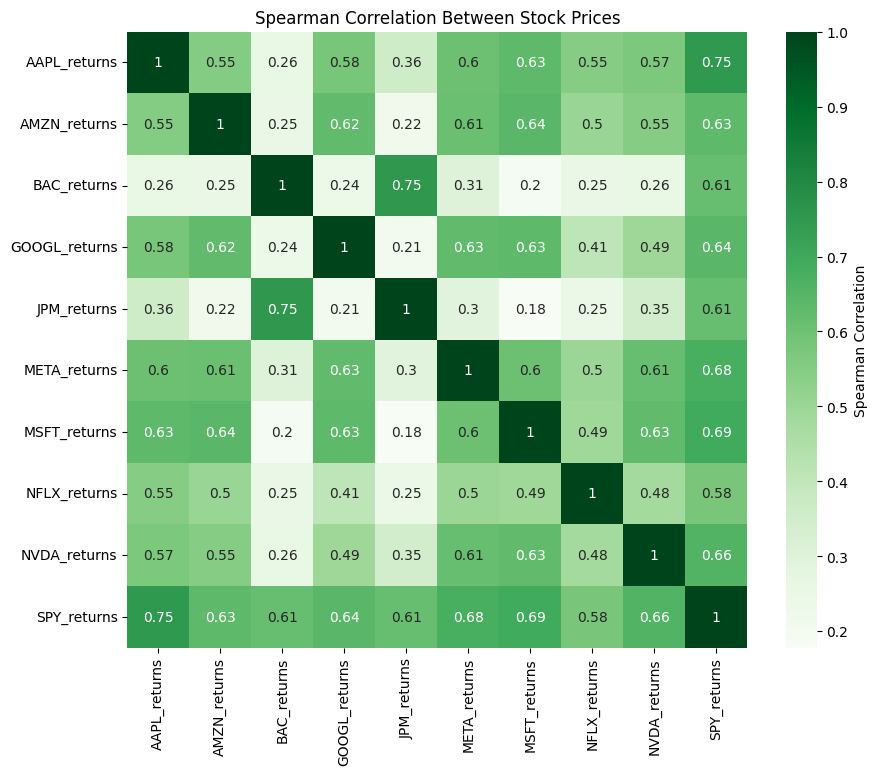

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# referred to https://www.askpython.com/python/examples/heatmaps-in-python

correlation_matrix = returns_pivot.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', cbar_kws={'label': 'Spearman Correlation'})
plt.title('Spearman Correlation Between Stock Prices')
plt.show()

In [ ]:
#A Each stock is perfectly correlated with itself.

In [ ]:
#B
#Took ChatGPT's help for this
max_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().idxmax()
min_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().idxmin()

max_corr_stock1, max_corr_stock2 = max_corr
min_corr_stock1, min_corr_stock2 = min_corr

max_corr_stock1 = max_corr_stock1.replace('_returns', '')
max_corr_stock2 = max_corr_stock2.replace('_returns', '')
min_corr_stock1 = min_corr_stock1.replace('_returns', '')
min_corr_stock2 = min_corr_stock2.replace('_returns', '')

print(f"Most positively correlated pair ({max_corr_stock1}, {max_corr_stock2}) with a correlation of {correlation_matrix.loc[max_corr]}")
print(f"Most negatively correlated pair ({min_corr_stock1}, {min_corr_stock2}) with a correlation of {correlation_matrix.loc[min_corr]}")


Most positively correlated pair (BAC, JPM) with a correlation of 0.7528595191833044
Most negatively correlated pair (JPM, MSFT) with a correlation of 0.17816529868651235


In [ ]:
#C
correlations_with_market = correlation_matrix['SPY_returns'].drop('SPY_returns')
positively_correlated = correlations_with_market.idxmax()
negatively_correlated = correlations_with_market.idxmin()

print(f"Most positively correlated with market is {positively_correlated.split('_')[0]} with a correlation of {correlations_with_market.max()}")
print(f"Most negatively correlated with market is {negatively_correlated.split('_')[0]} with a correlation of {correlations_with_market.min()}")

Most positively correlated with market is AAPL with a correlation of 0.7489097818934058
Most negatively correlated with market is NFLX with a correlation of 0.5763931723558214


In [ ]:
#D
correlations_with_aapl = returns_df.corrwith(returns_df['AAPL_returns'])

least_correlated_stock = correlations_with_aapl.idxmin()

print(f"The stock least correlated with AAPL is {least_correlated_stock.split('_')[0]} with a correlation of {correlations_with_aapl[least_correlated_stock]}")

The stock least correlated with AAPL is BAC with a correlation of 0.22544984072184265


## Further Exploration

### Part 6: Calculating Beta to the Market (Optional)

Optionally tackle this further exploration challenge, related to calculating beta to the market.




#### Understanding Beta

https://www.investopedia.com/ask/answers/070615/what-formula-calculating-beta.asp


> Beta is a measure used in fundamental analysis to determine the volatility of an asset or portfolio in relation to the overall market. The overall market has a beta of 1.0, and individual stocks are ranked according to how much they deviate from the market.

> A stock that swings more than the market over time has a beta greater than 1.0. If a stock moves less than the market, the stock's beta is less than 1.0. High-beta stocks tend to be riskier but provide the potential for higher returns. Low-beta stocks pose less risk but typically yield lower returns.

> As a result, beta is often used as a risk-reward measure, meaning it helps investors determine how much risk they are willing to take to achieve the return for taking on that risk. A stock's price variability is important to consider when assessing risk. If you think of risk as the possibility of a stock losing its value, beta is useful as a proxy for risk.



> To calculate the beta of a security, the covariance between the return of the security and the return of the market must be known, as well as the variance of the market returns.



\begin{align}
        Beta = \frac{Covariance} {Variance}
\end{align}



Where:
  + Covariance = Measure of a stock's return relative to that of the market
  + Variance = Measure of how the market moves relative to its mean


> **Covariance** measures how two stocks move together. A positive covariance means the stocks tend to move together when their prices go up or down. A negative covariance means the stocks move opposite of each other.

> **Variance**, on the other hand, refers to how far a stock moves relative to its mean. For example, variance is used in measuring the volatility of an individual stock's price over time. Covariance is used to measure the correlation in price moves of two different stocks.

> The formula for calculating beta is the covariance of the return of an asset with the return of the benchmark, divided by the variance of the return of the benchmark over a certain period.

#### Calculating Beta


We saw from the "Understanding Beta" section that we need to calculcate the variance of the market, as well as the covariance of each stock with respect to the market.

Luckily pandas makes this easy.

##### Variance

https://www.investopedia.com/terms/v/variance.asp

<img src="https://www.investopedia.com/thmb/_hIorwcVnDj-oKWhpTu_qnuUldM=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/Variance-TAERM-ADD-Source-464952914f77460a8139dbf20e14f0c0.jpg" height=300>

> FYI: standard deviation is the square root of the variance!

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html



In [ ]:
returns_df.var()

AAPL_returns     0.000172
AMZN_returns     0.000482
BAC_returns      0.000284
GOOGL_returns    0.000397
JPM_returns      0.000191
META_returns     0.000707
MSFT_returns     0.000275
NFLX_returns     0.000625
NVDA_returns     0.001044
SPY_returns      0.000073
dtype: float64

In [ ]:
returns_df.std() ** 2 # squaring the standard deviation, is equivalent to the variance

AAPL_returns     0.000172
AMZN_returns     0.000482
BAC_returns      0.000284
GOOGL_returns    0.000397
JPM_returns      0.000191
META_returns     0.000707
MSFT_returns     0.000275
NFLX_returns     0.000625
NVDA_returns     0.001044
SPY_returns      0.000073
dtype: float64

##### Covariance

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html

> Computes the pairwise covariance among the series of a DataFrame. The returned data frame is the covariance matrix of the columns of the DataFrame.

> This method is generally used for the analysis of time series data to understand the relationship between different measures across time.

In [ ]:
cov_mat = returns_df.cov()
cov_mat

,AAPL_returns,AMZN_returns,BAC_returns,GOOGL_returns,JPM_returns,META_returns,MSFT_returns,NFLX_returns,NVDA_returns,SPY_returns
AAPL_returns,0.000172,0.000125,0.000050,0.000141,0.000053,0.000191,0.000118,0.000138,0.000186,0.000082
AMZN_returns,0.000125,0.000482,0.000067,0.000268,0.000037,0.000337,0.000210,0.000203,0.000263,0.000115
BAC_returns,0.000050,0.000067,0.000284,0.000060,0.000171,0.000094,0.000035,0.000075,0.000102,0.000084
GOOGL_returns,0.000141,0.000268,0.000060,0.000397,0.000047,0.000324,0.000168,0.000156,0.000261,0.000106
JPM_returns,0.000053,0.000037,0.000171,0.000047,0.000191,0.000071,0.000019,0.000051,0.000110,0.000064
META_returns,0.000191,0.000337,0.000094,0.000324,0.000071,0.000707,0.000233,0.000211,0.000345,0.000135
MSFT_returns,0.000118,0.000210,0.000035,0.000168,0.000019,0.000233,0.000275,0.000156,0.000289,0.000089
NFLX_returns,0.000138,0.000203,0.000075,0.000156,0.000051,0.000211,0.000156,0.000625,0.000243,0.000096
NVDA_returns,0.000186,0.000263,0.000102,0.000261,0.000110,0.000345,0.000289,0.000243,0.001044,0.000153
SPY_returns,0.000082,0.000115,0.000084,0.000106,0.000064,0.000135,0.000089,0.000096,0.000153,0.000073


If we want to calculate the covariance of "this with respect to that", we can access the specific value from this matrix. For example, the covariance of NFLX with respect to the market:

In [ ]:
# if we have well defined index and columns, we can use the loc method and specify the name of the row, then the name of the column
# ... df.loc[row_name, col_name]

cov_mat.loc["NFLX_returns", "SPY_returns"]

9.647975046640574e-05

##### Beta

Calculating beta to the market (choose your own symbol as desired):

In [ ]:
## calculating beta to market for a given company:
symbol = "NVDA"
#
## get covariance between this stock and the market
cov_mat = returns_df.cov()
cov = cov_mat.loc[symbol + "_returns", "SPY_returns"] # using loc method to access a given [row, col] combo
print(f"COVARIANCE OF {symbol} WITH RESPECT TO THE MARKET:", cov)

COVARIANCE OF NVDA WITH RESPECT TO THE MARKET: 0.00015334254083018356


In [ ]:
var = returns_df["SPY_returns"].var()
print(f"VARIANCE OF THE MARKET:", var)


VARIANCE OF THE MARKET: 7.30756745094127e-05


In [ ]:
beta = cov / var
print(f"BETA OF {symbol} WITH RESPECT TO THE MARKET:", round(beta,3))

BETA OF NVDA WITH RESPECT TO THE MARKET: 2.098


https://www.investopedia.com/investing/beta-gauging-price-fluctuations/

Questions:

  + 6-A) How can we interpret this beta value? What does it tell us about the company's stock, and the risk involved?

A beta of 2.098 indicates that the stock moves +2.098% when the market moves +1% and -2.098% when the market moves -1%. This indicates high volatility in the stock which possess additional risk when the markets are bad. However, when the markets are good, the stock can potentially give us double the returns of the market.